# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

n_samples, n_features = data.shape # may be useful later
feature_names = data.columns

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
data_description = data.describe()
display(data_description)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,35942,38369,59598,3254,26701,2017
1,1774,3696,2280,514,275,834
2,15076,6257,7398,1504,1916,3113


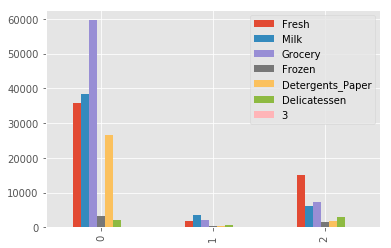

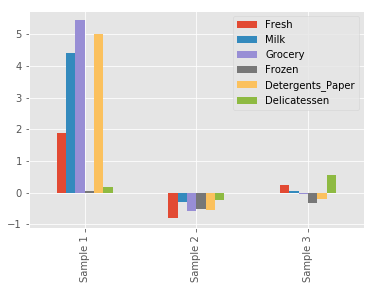

In [9]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [61, 320, 373] # selected using the cases below:

# the line below would give all data points above the means for each feature
# display(data[pd.concat((data[x] > data[x].mean() for x in data.columns), axis=1).all(axis=1)]) # selected 61 from output

# the line below would give all data points below the means for each feature
# display(data[pd.concat((data[x] < data[x].mean() for x in data.columns), axis=1).all(axis=1)]) # selected 320 from output

# Somewhere in the middle?
# display(data[(data['Fresh']>11000) & (data['Milk']>6000) & (data['Delicatessen']>2000) & (data['Detergents_Paper']<2000)])

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop=True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

samples_cpy = samples.copy()
samples_cpy[samples.shape[0]] = data.median()

import matplotlib.pyplot as plt

plt.style.use('ggplot')
samples_cpy.plot(kind='bar')
labels = samples.index.values.tolist()
labels.append("Data Median")
plt.xticks(range(samples.shape[0]),labels)

import seaborn as sns

samples_for_plot = samples.copy()
samples_for_plot = (samples_for_plot - data.mean())/data.std()

labels = ['Sample 1','Sample 2','Sample 3']
samples_for_plot.plot(kind='bar')
_ = plt.xticks(range(3),labels)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Frozen: 3071.9 * (this seemed to be missing) *
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

The __first sample__ has values _higher_ than the averages for _all_ features. It is possible that it represents a __wholesale retailer__.

The __second sample__ has values _lower_ than the averages for _all_ features. It is possible that it represents a __grocery store__, or a __cafe__, going by the amounts spent for 'Grocery' and 'Milk'.

The __third sample__ has values _higher_ than the averages for majority of food-based features. It is possible that it represents a __restaurant / deli__.


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
min,-12.315224,0.262385,-0.627939,-0.316549,0.664307,0.084506
mean,-6.056321,0.404623,-0.364065,-0.245815,0.691313,0.173519
max,-1.606830,0.506006,-0.193763,-0.178576,0.724705,0.295523


Fresh:            -0.7226
Milk:             0.0878
Grocery:          0.6829
Frozen:           -1.1922
Detergents_Paper:  0.6591
Delicatessen:     -3.4764


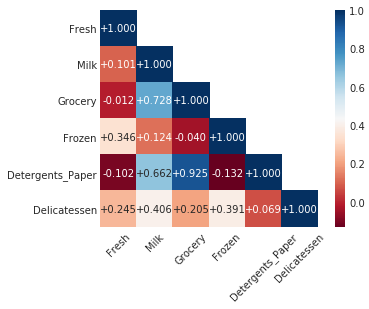

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


scores = [[] for i in range(len(data.columns))] # 6 columns
formatted_scores = {} # because I like my eyes
for i,f in enumerate(feature_names): # for each feature
    for j in range(100): # i've walked this road a hundred times (OK, no more)
        feature_removed = f
        # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
        new_data = data.drop(feature_removed, axis=1);

        # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
        # Set a random state.
        X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature_removed], test_size=0.25, random_state=42)

        # TODO: Create a decision tree regressor and fit it to the training set
        regressor = DecisionTreeRegressor(random_state=np.random) 
        regressor.fit(X_train, y_train)

        # TODO: Report the score of the prediction using the testing set
        score = regressor.score(X_test, y_test)
        scores[i].append(score)
        #print "Score for " + f + ":  " + str(score)        

    f_scores = np.asarray([scores[i]])
    formatted_scores[f] = pd.Series([f_scores.min(), f_scores.mean(), f_scores.max()], index=['min', 'mean', 'max'])
    # print "\nScores for {}:\n\tAverage: {}\n\tmin: {}\n\tmax: {}".format(f, f_scores.mean(), f_scores.min(), f_scores.max())

# the code above drops each feature a hundred times, each time running a DecisionTreeRegressor with a random state
# the line below displays the results (minimum, mean and maximum scores) of the runs, for each feature as the label
display(pd.DataFrame(formatted_scores))

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

def calculate_r_2_for_feature(data,feature):
    new_data = data.drop(feature, axis=1)

    X_train, \
    X_test,  \
    y_train, \
    y_test = train_test_split(
        new_data,data[feature],test_size=0.25
    )

    regressor = DecisionTreeRegressor()
    regressor.fit(X_train,y_train)

    score = regressor.score(X_test,y_test)
    return score

def r_2_mean(data,feature,runs=200):
    return np.array([calculate_r_2_for_feature(data,feature)
                     for _ in range(200) ]).mean().round(4)

print "{0:17} {1}".format("Fresh: ", r_2_mean(data,'Fresh'))
print "{0:17} {1}".format("Milk: ", r_2_mean(data,'Milk'))
print "{0:17} {1}".format("Grocery: ", r_2_mean(data,'Grocery'))
print "{0:17} {1}".format("Frozen: ", r_2_mean(data,'Frozen'))
print "{0:17} {1}".format("Detergents_Paper: ", r_2_mean(data,'Detergents_Paper'))
print "{0:17} {1}".format("Delicatessen: ", r_2_mean(data,'Delicatessen'))

corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

I attempted to predict all of the features individually and it seems that __'Grocery'__ has the _highest_ prediction score (__over .73__) out of all the features while the feature __'Delicatessen'__ has the _lowest_. Running the test multiple times with different random states shows that the values of the scores waver with variable strengths: __Grocery__ seems to average around __0.69__ while __Delicatessen__ can go __below -12__.

I would argue that none of the scores are sufficiently high for any of the features in the current dataset to be considered irrelevant. If more data was available, the score for Grocery (or some other feature) may have gotten higher - perhaps enough to render it unnecessary, but right now, I would say this is not the case.

Would you agree?

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.


Distribution of data for each feature: 


,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
% Data Below 1000,51.59%,55.23%,10.68%,36.59%,6.36%,13.18%
% Data Below 5000,95.68%,81.36%,33.86%,82.27%,51.36%,61.36%
% Data Below 10000,99.09%,94.09%,57.05%,95.00%,73.41%,85.00%
% Data Below 20000,99.77%,98.64%,81.82%,99.32%,91.36%,95.45%
% Data Below 50000,100.00%,100.00%,98.41%,99.77%,99.09%,99.55%
Values above 50000,0,0,7,1,4,2
max,47943,40827,112151,60869,92780,73498



Pairwise correlation using standard (Pearson) correlation coefficient: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000



Pairwise correlation using Kendall Tau correlation coefficient: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,-0.053144,-0.077839,0.267362,-0.132532,0.163413
Milk,-0.053144,1.000000,0.586369,-0.060406,0.505805,0.261800
Grocery,-0.077839,0.586369,1.000000,-0.109746,0.632382,0.209909
Frozen,0.267362,-0.060406,-0.109746,1.000000,-0.133956,0.159928
Detergents_Paper,-0.132532,0.505805,0.632382,-0.133956,1.000000,0.119364
Delicatessen,0.163413,0.261800,0.209909,0.159928,0.119364,1.000000



Spearman rank correlation: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,-0.083921,-0.119983,0.384395,-0.198333,0.238400
Milk,-0.083921,1.000000,0.773049,-0.092971,0.679979,0.372771
Grocery,-0.119983,0.773049,1.000000,-0.168831,0.801282,0.304256
Frozen,0.384395,-0.092971,-0.168831,1.000000,-0.207183,0.233024
Detergents_Paper,-0.198333,0.679979,0.801282,-0.207183,1.000000,0.183314
Delicatessen,0.238400,0.372771,0.304256,0.233024,0.183314,1.000000



Heatmap using the standard (Pearson) correlation coefficient: 


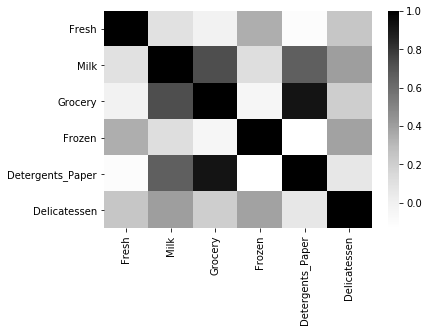

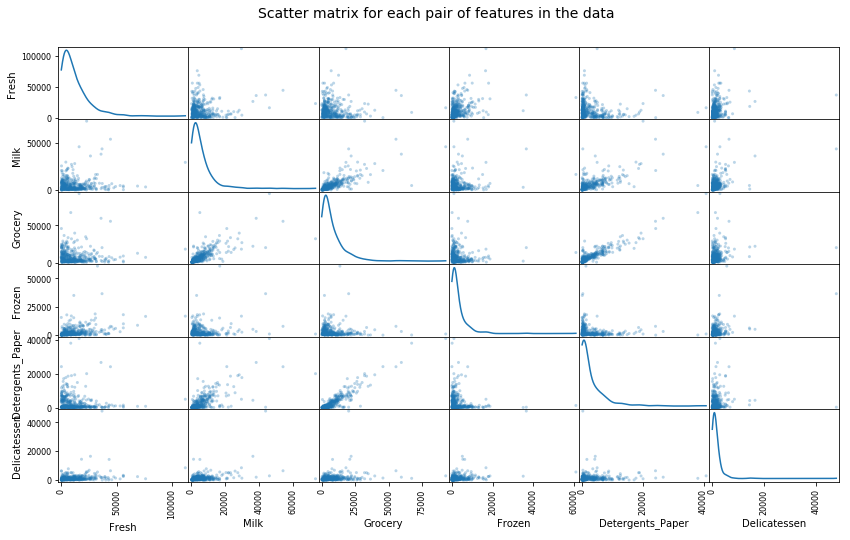

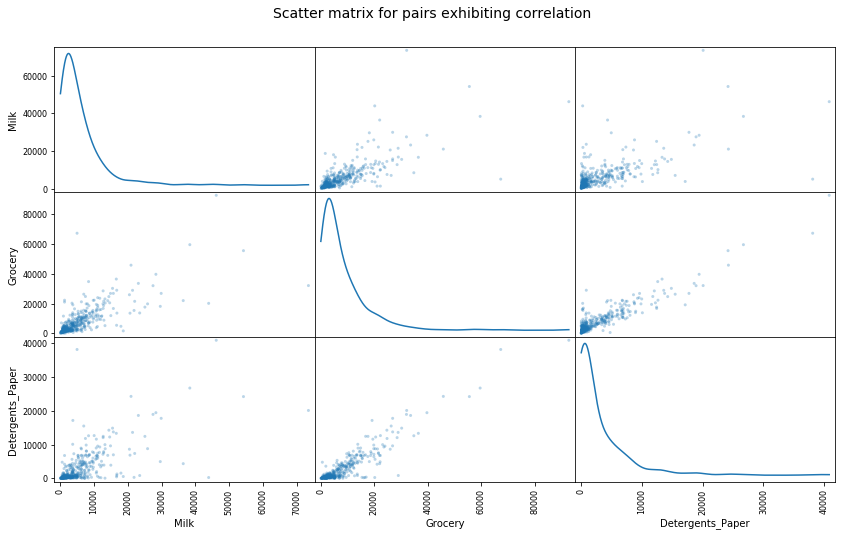

In [403]:
import matplotlib.pyplot as plt
import seaborn as sns

# let's see how distributed the data is
# the code below calculates and displays the percentage of data of each feature within a few limits 
feature_skewness = {}
limits = [1000, 5000, 10000, 20000, 50000] 
index = None
feature_skewness_index = ["% Data Below " + str(limit) for limit in limits]
feature_skewness_index.append("Values above {}".format(limits[-1]))
feature_skewness_index.append("max")
print "\n\nDistribution of data for each feature: "
for f in feature_names:
    percentages = None
    feature_skewness_data = []
    # for each limit in limits, the loop below appends the percentage of data present in f below that limit
    for limit in limits:
        feature_skewness_data.append("{:.2f}%".format(float(len(data[data[f]<limit])) * 100 / n_samples))

    feature_skewness_data.append("{}".format(len(data[data[f]>limits[-1]])))
    feature_skewness_data.append(data[f].max())
    feature_skewness[f] = pd.Series(feature_skewness_data, feature_skewness_index)
display(pd.DataFrame(feature_skewness))

# get correlation between features through different methods in tabular format:
print '\n\nPairwise correlation using standard (Pearson) correlation coefficient: '
display(data.corr())
print '\n\nPairwise correlation using Kendall Tau correlation coefficient: '
display(data.corr(method='kendall'))
print '\n\nSpearman rank correlation: '
display(data.corr(method='spearman'))

# Produce a heatmap using the standard (Pearson) correlation coefficient 
print "\n\nHeatmap using the standard (Pearson) correlation coefficient: "
sns.heatmap(data.corr(), cmap="Greys")



# Produce a scatter matrix for each pair of features in the data

# print "\nScatter matrix for each pair of features in the data: "
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
t = plt.suptitle("Scatter matrix for each pair of features in the data", y=.95, fontsize=14)

# print "\nScatter matrix for pairs exhibiting correlation: "
pd.plotting.scatter_matrix(data[['Milk', 'Grocery', 'Detergents_Paper']], alpha = 0.3, figsize = (14,8), diagonal = 'kde');
t = plt.suptitle("Scatter matrix for pairs exhibiting correlation", y=.95, fontsize=14)

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

For _every_ feature in the dataset, the data is _not_ normally distributed; it is _right-skewed_, implying that a majority of the values are small. As the first table shows: at least __80%__ of the data for all features is __below 20,000__, and for half of the features, over __90%__ of data is below __10,000__. The upper bounds being over 40,000 (a lot more than that for some) for each of the features cause the skewness of the graph. Coupled with the lack of pairwise correlation between some of the features, this causes much of the data to be near 0. 

\*As for the outliers: individually, 3 of the features - __Fresh__, __Grocery__, and __Milk__ -  have about __3.41%__, __1.14%__ and __.68%__ of their data values (respectively) either __above 50000__ or __below 100__. If the majority of their values lie between those two values, we would have about __15__, __5__, and __3__ outliers for those features.  The lack of pairwise correlation between some of the features makes identifying outliers a little bit difficult, but individually - I would say that the values that are extremely high may be considered outliers.

However, three of the pairs do exhibit some degree of pairwise correlation. In descending order, those are (__Grocery, Detergents_Paper__), (__Grocery, Milk__) and (__Milk, Detergents_Paper__). This pattern does not change when changing the method of calculation the correlation coefficient (though its values are affected). The first pair seems to exhibit positive correlation while the latter two are somewhat heteroscedastic, though it is difficult to be exact without proper computation. 

The averages for the scores predicted for each of the features in one of the previous blocks to determine their relevance were positive for Grocery, Detergents_Paper and Milk (and descending in that order) and negative for the other three. The correlated pairs having positive averages makes sense, as it may be possible to predict their values (perhaps somewhat approximately) due to the correlation, confirming the previous result (and possibly making the other three features more relevant).


<br />
\* _Outlier Calculation:_
The calculation above is done in the following way:  
For __Fresh__, the percentage of data __below 100__ is __1.82__  
And data __above 50000__ is _100 - 98.41_ =  __1.59__  
That gives us a total of 1.82 + 1.59 = __3.41%__  
__3.41%__ of __440__ is __15.004__, so there should be about __15 outliers__, if all of this holds up (I could be wrong)

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

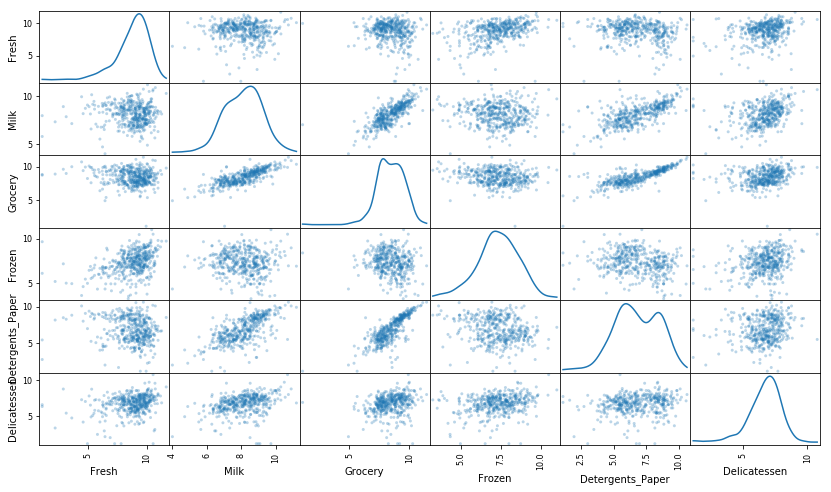

In [404]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [405]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.489662,10.555005,10.995377,8.087640,10.192456,7.609367
1,7.480992,8.215006,7.731931,6.242223,5.616771,6.726233
2,9.620859,8.741456,8.908965,7.315884,7.557995,8.043342


## Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [406]:
from itertools import izip
outlier_data = {}
highs_and_lows = {}

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    low = Q1 - step
    high = Q3 + step
    highs_and_lows[feature] = {"low": low, "high": high} # we'll use these below
    
    outliers = ~((log_data[feature] >= low) & (log_data[feature] <= high))
    
    # Display the outliers
    print "\n{} Data points considered outliers for the feature '{}': low={}, high={}, step={}".format(len(log_data[outliers].index.values), feature, low, high, step)
    display(log_data[outliers])
    
    # collect outliers and their values in a dictionary
    f_outlier_dict = (log_data[outliers][feature].to_dict())
    for outlier in f_outlier_dict:
        if not outlier_data.has_key(outlier):
            outlier_data[outlier]={}
        outlier_data[outlier][feature] = f_outlier_dict[outlier] # merge dictionaries for all features
         
    print '' # a blank line because the lack of seperation was bugging me


                

# OPTIONAL: Select the indices for data points you wish to remove
outliers = []

# to decide whether an outlier should be eliminated
# the code below attempts to find whether it is an outlier for multiple features
# and if it is, the code then calculates its 'outlyingness' (in this case just a percentage change from the limits)
# and compares it the threshold for decision

outlyingness_threshold = .05
for outlier in outlier_data.keys():
    if (len(outlier_data[outlier].keys())) < 2:
        outlier_data.pop(outlier) # remove outlier from consideration if it outlies only for one feature
    else: 
        # otherwise, calculate outlyingness (in this case - percentage change from low or high)
        for feature in outlier_data[outlier]:
            outlyingness = outlier_data[outlier][feature]
            low = highs_and_lows[feature]['low']
            high = highs_and_lows[feature]['high']
            
            # calculate percentage increase or decrease
            if(outlyingness < low):
                outlyingness=(low - outlyingness)/low
            else:
                outlyingness=(outlyingness - high)/high
            outlier_data[outlier][feature] = outlyingness
            
            # choose outlier if it is over threshold
            if outlyingness > outlyingness_threshold and outlier not in outliers: outliers.append(outlier) 
            
print "Outliers in multiple features: " + str(outlier_data.keys())
print "Outlyingness (percentage change from low/high) of outliers in multiple features: ";
display(pd.DataFrame(outlier_data).T)
print "\nChosen outliers: " + str(outliers)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


16 Data points considered outliers for the feature 'Fresh': low=5.51455083361, high=12.2705718166, step=2.53350786861


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382




4 Data points considered outliers for the feature 'Milk': low=5.01673296722, high=11.1987283614, step=2.31824827282


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275




2 Data points considered outliers for the feature 'Grocery': low=5.27575998758, high=11.672709891, step=2.3988562138


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442




10 Data points considered outliers for the feature 'Frozen': low=4.26035024816, high=10.5252235842, step=2.34932750101


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244




2 Data points considered outliers for the feature 'Detergents_Paper': low=1.45874266385, high=12.3636993597, step=4.08935876094


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101




14 Data points considered outliers for the feature 'Delicatessen': low=3.76959400251, high=9.74900908097, step=2.24228065442


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372



Outliers in multiple features: [128, 154, 65, 66, 75]
Outlyingness (percentage change from low/high) of outliers in multiple features: 


,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
65,NaN,NaN,0.194377,0.158868,NaN,NaN
66,0.125679,NaN,0.601559,NaN,NaN,NaN
75,NaN,0.246877,NaN,NaN,0.791762,NaN
128,0.708560,NaN,0.103890,NaN,NaN,NaN
154,0.448365,NaN,NaN,NaN,0.067437,0.201207



Chosen outliers: [128, 154, 65, 66, 75]


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

It seems that, based on the definition above, data points at indexes __[65, 66, 75, 128, 154]__ are considered outliers for more than one feature. 

I am not entirely sure whether all of these data points _should_ be removed from the dataset, though a strong case could be made for __154__ to be removed as it is an outlier for _half of the features_. I would suggest to use one of two strategies: either calculate the degree of outlyingness (I hope that is a thing - I have tried to use percentage change as an example here) for each outlier to help decide whether it would be a good idea to drop it, or juggle accuracy with time and see whether including or excluding the outliers generates a better result.

I have currently chosen to remove these data points because they are _unusual for multiple features_, and thus _may_ decrease correlation / prediction. Also, removing these removes only about 1.14% of the data and perhaps does not take much away (though that is debatable).


In the previous question, I attempted to calculate the number of outliers for 'Fresh', 'Grocery', and 'Milk' individually and got __15, 5, and 3__ as answers. The actual number of outliers using the definition in this section turned out to be __16, 2, and 4__. I guess it was mostly a miss, and an approximate hit. I think feature scaling has helped in this case.   

Since it is possible that an outlier for a single feature may be relevant for the data as a whole, it would be prudent to keep such outliers in the dataset.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,0.2638,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941
Dimension 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,-0.0026,0.7192,0.3554,-0.0331,-0.5582,-0.2092
Dimension 6,0.0204,0.0292,-0.5402,0.8205,0.0205,-0.1824,0.0197


,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,0.7068,-0.5184,-0.5686,-0.5088,-0.3223,-0.7938,-0.6440
Dimension 3,0.8299,-1.1958,-0.5284,-0.5283,-0.0073,-1.0055,-0.0154
Dimension 4,0.9311,-1.4001,-0.5156,-0.4726,0.7781,-0.7959,-0.5577
Dimension 5,0.9796,-1.4027,0.2036,-0.1172,0.7450,-1.3541,-0.7669
Dimension 6,1.0000,-1.3735,-0.3366,0.7033,0.7655,-1.5365,-0.7472


[ 0.44302505  0.26379218  0.1230638   0.10120908  0.04850196  0.02040793]


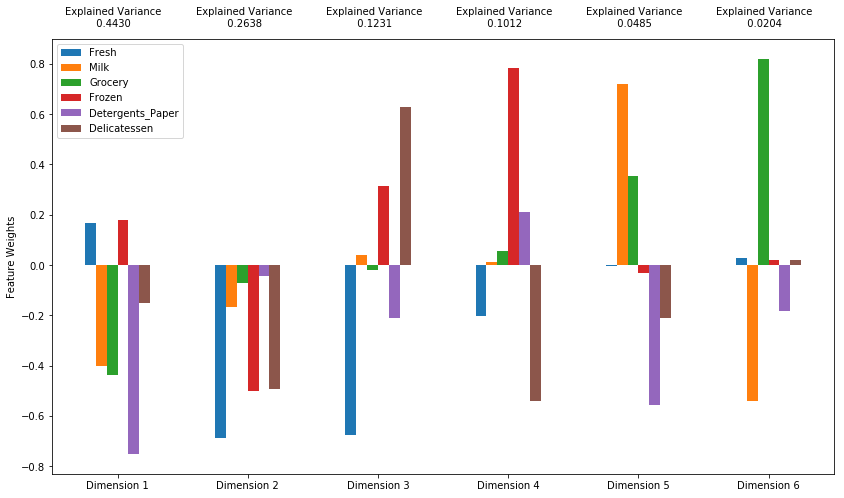

In [407]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=n_features).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

display(pca_results)
display(pca_results.cumsum())
print pca.explained_variance_ratio_

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

__In total__, the first and second principal components explain about __0.7068__ or __70.68%__ of the variance in the data.

The first four principal components explain about __0.9311__ or __93.11%__ of the variance in the data; in order, they explain about 44.30%, 26.38%,  12.31%,  and 10.12% respectively.

The __first dimension__ explains __negative variance__ for Detergents_paper (-0.7514), Grocery (-0.4381), Milk (-0.4014), and Delicatessen (-0.1499) and positive variance for Fresh (0.1675) and Frozen (0.1782). The magnitudes of these variances suggest that customers with __higher negative__ values for this dimension would tend to have __greater__ values for the Detergents_paper, Grocery and Milk, specifically. This dimension may represent grocery stores with its lower values. Also, about 44% of the variance is explained by this dimension.

Almost conversely, the __second dimension__, while explaining __negative variance__ for all the features, has higher values for Fresh (-0.6859), Frozen (-0.5005), and Delicatessen (-0.4941), and lower values for Milk (-0.1672), Grocery (-0.0707) and Detergents_paper (-0.0424), implying that the lower the values for this dimension are, the higher the expenditure would be, specially for the first three categories (the ones with higher negatives). This dimension may represent restaurants with its lower values. Together, the first and second dimensions explain about 70.68% of the variance of the data.

The __third dimension__ has __high negative__ and __high positive variance__ for Fresh (-0.6774) and Delicatessen (0.6286) respectively. Both, the first dimension and the third dimension, have the variance of Fresh & Delicatessen close by in magnitude but opposite in sign, perhaps suggesting that there is a contrast between these two features? The cumulative variance explained so far is about 83%, a 12% increase from the first two dimensions. Also, the positive variance for Frozen (0.315) coupled with the higher value for the same for Delicatessen inclines me to believe that this dimension may represent Delis with higher values. I could be wrong.

Almost conversely, The __fourth dimension__ seems to have Frozen and Delicatessen on opposing teams. The __high positive variance__ for Frozen suggests that data points with greater values in this dimension will tend to have greater values for Frozen. This dimension represents about 10% of the variance of the data, cumulatively reaching slightly over 93%.

The last two dimensions explain the remaining variance of the data, with the __fifth dimension__ probably representing cafes (due to its positive variance for values in Milk and Grocery, and negative for Detergents Paper) and the __sixth dimension__ almost purposefully following the recurring pattern and allowing me to use the word conversely for a third time with the opposing variances for Milk and Grocery.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [408]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-4.3474,-2.7451,-1.0220,0.6346,0.5311,0.2344
1,0.7597,1.4951,0.8179,-0.8920,0.4959,-0.4879
2,-1.0737,-1.4146,0.1218,-0.7210,-0.1073,-0.0500


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [409]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [410]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-4.3474,-2.7451
1,0.7597,1.4951
2,-1.0737,-1.4146


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

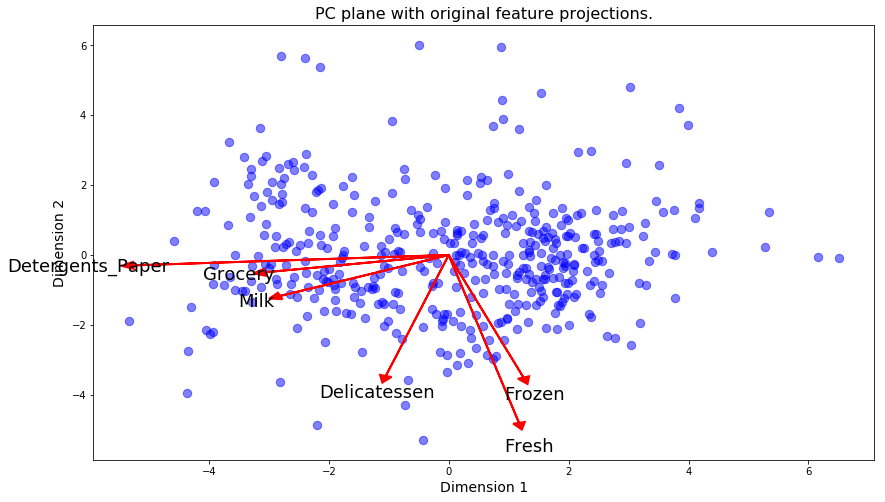

In [411]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?


-----
__Note to reviewer:__  
_Perhaps unnecessary:_ The figure does not appear to be as described above, it seems inverted. I may have made mistakes somewhere above, but I also found out that there was an [update to the PCA](https://github.com/scikit-learn/scikit-learn/blob/4c65d8e/sklearn/decomposition/pca.py#L391) that may have caused this. I also found that such inversion [does not affect the variance explanation](https://stats.stackexchange.com/questions/88880/does-the-sign-of-scores-or-of-loadings-in-pca-or-fa-have-a-meaning-may-i-revers). If this is not the case, then the figure above, the pca_results before Question 5, and my answer may all be incorrect. If so, can you please tell me where I went wrong? Thank you.

-----

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

While there are many ways to categorize them, in a way both K-means and Gaussian Mixture Model are _Expectation-Maximization algorithms_, so they have some similarities (such as [local convergence](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm#Properties) - a problem that is usually solved with multiple initializations). K-Means is [a special case](https://en.wikipedia.org/wiki/K-means_clustering#Gaussian_mixture_model) of the Gaussian Mixture Model, [with a small, all-equal, diagonal covariance matrix](http://scikit-learn.org/stable/modules/clustering.html#k-means). In other words, K-Means performs hard clustering while Gaussian Mixture Model performs soft clustering.

Because of that, K-means is [generally faster](https://dcornellresearchdotorg.files.wordpress.com/2015/10/ee6540_final_project-1.pdf) than Gaussian Mixture Model.

However, [unlike](https://en.wikipedia.org/wiki/K-means_clustering#Discussion) K-means, the Gaussian Mixture Model does not [bias the cluster sizes to have specific structures](http://scikit-learn.org/stable/modules/mixture.html#pros-and-cons-of-class-gaussianmixture) (such as being spherical in shape or having similar sizes) and may outperform K-means in some cases. This can be seen in one of the examples [linked previously](https://dcornellresearchdotorg.files.wordpress.com/2015/10/ee6540_final_project-1.pdf).

As evidenced [here](https://en.wikipedia.org/wiki/File:ClusterAnalysis_Mouse.svg#/media/File:ClusterAnalysis_Mouse.svg) and [here](https://stackoverflow.com/questions/36331532/k-means-more-accurate-than-gaussian-mixture-model-in-certain-image-regions), both algorithms may outperform each other on different problems. Thus it is difficult to decide which one would perform better in this case. Perhaps this decision could be made easier if we have some information about expected clusters; for example: let us assume that we expect there to be 4 clusters - Wholesale Retailers, Grocery Stores, Restaurants and Cafes. K-Means may prove better if each cluster's spending habits were almost clearly seperable from the rest (e.g. Grocery stores spend more on Grocery and Detergents paper, while restaurants spend more on Fresh, Frozen and Delicatessen) and the data points were almost evenly distributed among the clusters. Gaussian Mixture may prove better if the clusters tend to overlap (Cafes & Restaurants may both spend on Fresh in a comparable amount; Grocery stores and cafes may spend relatively similarly on Milk, etc).

According to the biplot above, the data points on the left of seem to spend a larger amount on Detergents_paper and Grocery (as discussed in question 5, for lower values in Dimension 1), but it is a little difficult to correctly identify the number of clusters, and the existence a possible transition between them, just by looking at the plot. I think it would be a good idea to decide the algorithm to use through experimentation with both.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [412]:
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.model_selection import RandomizedSearchCV

clusterer = None
preds = None
centers = None
sample_preds = None
score = 0
clusters = None

cluster_count= [2, 3, 4, 5]

# checking results of both algorithms with different cluster sizes: 
    
for n_clusters in cluster_count:

    clusterer_i = KMeans(n_clusters=n_clusters, n_jobs=-1).fit(reduced_data)
    preds_i = clusterer_i.predict(reduced_data)
    centers_i = clusterer_i.cluster_centers_
    sample_preds_i = clusterer_i.predict(pca_samples)
    score_i = silhouette_score(reduced_data, preds_i)
    print "Score for KMeans with {} clusters: {}".format(n_clusters, score_i)
    if score_i > score: 
        clusterer, preds, centers, sample_preds, score, clusters = clusterer_i, preds_i, centers_i, sample_preds_i, score_i, n_clusters
    
    
    clusterer_i = GaussianMixture(n_components=n_clusters).fit(reduced_data)
    preds_i = clusterer_i.predict(reduced_data)
    centers_i = clusterer_i.means_
    sample_preds_i = clusterer_i.predict(pca_samples)
    score_i = silhouette_score(reduced_data, preds_i)
    print "Score for GaussianMixture with {} clusters: {}".format(n_clusters, score_i)
    if score_i > score: 
        clusterer, preds, centers, sample_preds, score, clusters = clusterer_i, preds_i, centers_i, sample_preds_i, score_i, n_clusters
    
print "\nHighest scoring model is: {} with {} clusters, the score is {}.".format(clusterer.__class__.__name__, clusters, score)

Score for KMeans with 2 clusters: 0.426281015469
Score for GaussianMixture with 2 clusters: 0.421916846463
Score for KMeans with 3 clusters: 0.397423420008
Score for GaussianMixture with 3 clusters: 0.395557474541
Score for KMeans with 4 clusters: 0.331553519898
Score for GaussianMixture with 4 clusters: 0.345867137512
Score for KMeans with 5 clusters: 0.349997797526
Score for GaussianMixture with 5 clusters: 0.202550907223

Highest scoring model is: KMeans with 2 clusters, the score is 0.426281015469.


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

I tried both algorithms with cluster sizes [2, 3, 4, and 5]

The Silhouette Scores are:
* For K-Means:
    * __2 clusters: 0.426281015469__
    * 3 clusters: 0.397138208845
    * 4 clusters: 0.331195584161
    * 5 clusters: 0.349997797526  
  
  
* For Gaussian Mixture:
    * 2 clusters: 0.422324682646
    * 3 clusters: 0.37781736387
    * 4 clusters: 0.349289978411
    * 5 clusters: 0.271914760583

The model with the best score is __K-Means, with 2 clusters__. The score is __0.426281015469__.


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

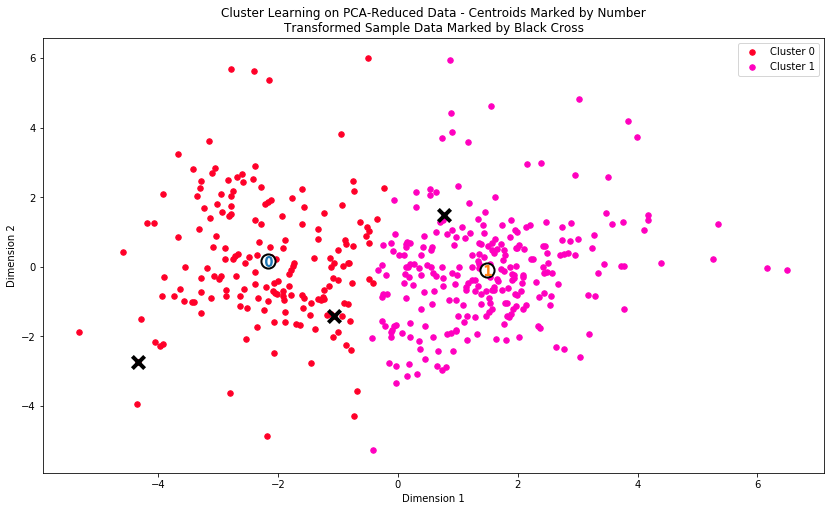

In [413]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [416]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)


# the code below displays the means and compares how far away the segments are from the means

display(data_description[1:2])
distance_from_centers = true_centers.copy()
deviations_from_centers = true_centers.copy()

for index, row in true_centers.iterrows():
    for item in row.iteritems():
        mean = data_description[item[0]]['mean']
        distance_from_centers[item[0]][index] = (item[1]-mean)/mean    
        deviations_from_centers[item[0]][index] = (item[1]-data_description[item[0]]['mean'])/data_description[item[0]]['std']       

print "\n\nPercentage change from means for segments: "
display(distance_from_centers)

print "\n\nStandard deviations from means for segments: "
display(deviations_from_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455



Percentage change from means for segments: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-0.666258,0.362946,0.522271,-0.690097,0.58286,-0.320598
Segment 1,-0.261102,-0.672720,-0.688478,-0.320297,-0.89797,-0.553405



Standard deviations from means for segments: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-0.632173,0.285044,0.436983,-0.436679,0.352256,-0.173352
Segment 1,-0.247744,-0.528329,-0.576048,-0.202677,-0.542696,-0.299234


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

Segment 0 has values higher than the average for Milk, Grocery and Detergents paper, and lower for the rest. It probably represents grocery / retail stores.

Segment 1, on the the hand, has values lower than the mean for each category. However, the values for Fresh, Frozen and Delicatessen are closer to the mean than the others. This segment may thus represent restaurants / delis.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*


Run the code block below to find which cluster each sample point is predicted to be.

In [421]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

print "\nLet's see how accurate this is. We have the following samples: "
display(samples)

samples_pc = samples.astype('float', copy=True)
samples_sd = samples.astype('float', copy=True)
for index, row in samples.iterrows():
    for item in row.iteritems():
        mean = data_description[item[0]]['mean']
        samples_pc[item[0]][index] = float((item[1]-mean)/mean)
        samples_sd[item[0]][index] = float((item[1]-data_description[item[0]]['mean'])/data_description[item[0]]['std'])
        
print "\n\nThe percentage change (from the mean) for these samples seems to be: "    
display(samples_pc)
        
print "\n\nThe number of standard deviations (from the mean) for these samples seems to be: "    
display(samples_sd)

print "\n\nThe deviations (from the mean) for the centers of the segments, displayed again for drawing comparisons: "    
display(deviations_from_centers)

# the code below calculates the sum of the absolute differences between the samples' and the segments' standard deviations
sod = [[] for i in range(len(samples_copy))]
for i in range(len(samples_copy)):  # for each sample
    sum_sample = {}
    for index, row in true_centers.iterrows():# for each segment  
        sum_seg = 0
        for item in row.iteritems():
            sum_seg += abs(samples_copy[item[0]][i] - deviations_from_centers[item[0]][index])
        sum_sample[index]=sum_seg
    sod[i] = sum_sample

print "\n\nThe sum of absolute differences between segment_std and sample_std:  "    
display(pd.DataFrame(sod))

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0

Let's see how accurate this is. We have the following samples: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,35942,38369,59598,3254,26701,2017
1,1774,3696,2280,514,275,834
2,15076,6257,7398,1504,1916,3113




The percentage change (from the mean) for these samples seems to be: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1.995092,5.619607,6.495400,0.059268,8.266376,0.322735
1,-0.852170,-0.362348,-0.713254,-0.832679,-0.904563,-0.453068
2,0.256302,0.079488,-0.069583,-0.510406,-0.335067,1.041485




The number of standard deviations (from the mean) for these samples seems to be: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1.893024,4.413424,5.434688,0.037504,4.995854,0.174507
1,-0.808574,-0.284574,-0.596778,-0.526901,-0.546681,-0.244980
2,0.243190,0.062427,-0.058220,-0.322974,-0.202501,0.563145




The deviations (from the mean) for the centers of the segments, displayed again for drawing comparisons: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-0.632173,0.285044,0.436983,-0.436679,0.352256,-0.173352
Segment 1,-0.247744,-0.528329,-0.576048,-0.202677,-0.542696,-0.299234




The sum of absolute differences between segment_std and sample_std:  


,Segment 0,Segment 1
0,17.116921,19.345729
1,2.840568,1.207776
2,2.998142,2.922387


**Answer:**

__Before Calculation:__

Sample point 0 has all values over the means (as was intended during selection), and it seems that the values for Milk, Grocery and Detergents_Paper are much higher than their means than the values for the other three. This point should thus belong to Segment 0. The prediction for this point to be in Cluster 0 is correct.

Sample point 1 has all values below the means (as was intended during selection). It's values for Milk, Detergents_Paper, Delicatessen and Grocery seem closer to Segment 1's values. I would say that it belongs to Segment 1 and the prediction is correct.
  
It is difficult to decide for Sample point 2, let's do some calculation above.
  
----

_The code above calculates the sum of absolute differences between the standard deviations for the samples and the standard deviation of the segment for each of the features, for each segment. The segment with the lower value should contain the point. I do not know how accurate this method is, and whether it's completely wrong to even attempt this. If so, please do let me know._

----
  
__After Calculation:__

It seems that the the third sample point is a bit problematic. The prediction for this sample point is to be in Cluster 0, however the calculation above suggests Cluster 1. It should be noted that the data is not normally distributed (which undermines my logic used for calculation here), that coupled with the point being close to the boundary of its cluster (and the sum of differences being so close by), I would give the prediction the benefit of the doubt and say that it is right. It belongs to Segment 0, and Cluster 0.


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

There are two customer segments, one that mostly orders Food related products, while the other focuses more on grocery, let us label them __Restaurants__ and __Retail Stores__.

While I wouldn't say which one may react _positively_ to the change, I would argue that customers in the customer segment 'Retail Stores' may react _less negatively_ to it than the customers in the 'Restaurants' segment. The reason I say so is because I assume that the latter would require a fresher inventory of products and hence would like the deliveries to be more frequent while the former can opt to stock up if necessary.

But what's one man's opinion? A hypothesis, of course! Let's formalize that.

When the morning deliver service changes from 5 days a week to a cheaper, 3 evenings a week service, there are three cases: the reaction is neutral, positive, or negative (i.e cancellations / complaints). The first case (the reaction being neutral / the change being inconsequential) is the Null Hypothesis for an A/B test on this data, with the Alternative Hypothesis being: there being consequences.

For the test, we then need samples from both clusters in two groups - a Control Group and a Test Group. The Control Group would experience no changes in the delivery service; in other words: samples (from both the clusters) that are present in the Control Group take the blue pill. The Test Group - which also contains samples from both clusters - would get to experience the new delivery service. 

The selection of samples here is a non-trivial problem (though that may be up for debate), and a perfect solution to it may exist, but may be difficult to find. To understand this, let's take a detour: assume (because we do not have this information) that the wholesale distributor is in the city __I__ and supplies to customers in the cities __C__, __I__, __T__ and __Y__, in the State __S__. There is no reason to believe that customers in __I__ will react to the changes the same way as they do for __Y__, but undesirable consequences may be reason enough to be sceptical about it. A good idea would be to conduct tests seperately, at least in a few of the cities - until there is enough data to scale it upwards. This is because there maybe cases such as __C__ having __Retailers__ reacting positively while __Restaurants__ react negatively, while __T__ has vice versa, all while the collective response from __I__ is neutral. Thus, selected samples should represent the population well. Food for thought: perhaps this is because our current clustering  model does not allow it, but there are cases we haven't even considered yet in this section - such as a Restaurant data point being a restaurant or a cafe and a Retailer being a wholesale retailer or a grocery store. Maybe hierarchical clustering would have helped identify such clusters.

Speaking of cases, let us get back to the pills. Er... I mean the Groups. There are 9 possible outcomes here. Each cluster may react in one of the 3 possible ways: neutral, positive or negative. The outcomes here can help determine which customers may react in the desired manner and perhaps the model can be scaled for a larger sample or the population. If enough consideration is given to the sample selection problem discussed above (with respect to the time constraints, complexity and the urgency of the action to be taken), A/B Testing can prove to be incredibly efficient. Multiple Control Groups and Test Groups (for example: a pair for each city, for a few cities) can be used simultaneously to get results quicker.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

The distributor can __train a supervised classifier__ on the _original customer data_, with the __customer segments as the labels__. This classifier can then be used to label the new customers using their estimated product spending.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

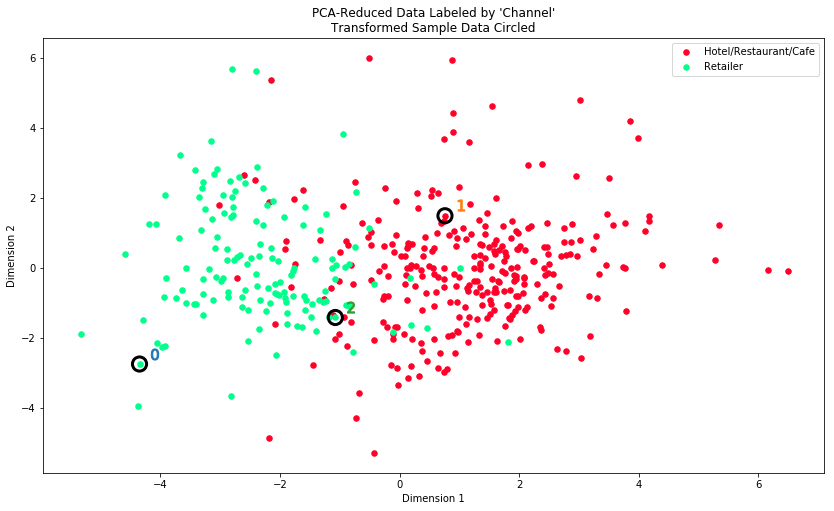

In [399]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

Looking at the plot above and comparing it with the previous plots, I would argue that clustering algorithm is _passably commensurate_ with the underlying distribution. While it is difficult to be specific about the degree of correspondence between the predicted and the actual distribution, it is definitely not perfect, though the number of clusters was identified correctly.

I do not entirely understand the second part of this question. While it is possible that values on the extreme left tend to be Retailers and the ones on the extreme right tend to be HoReCa, the boundaries of the clusters seem to be fuzzy and the clusters themselves seem to overlap. This is somewhat surprising considering that K-Means had a better Silhouette Score though Gaussian Mixture Model is the one that usually handles overlaps better. I do not believe that the segments can be classified purely, since each cluster seems to have some customers from the other segment.

While the degree of consistency is debatable, I would consider these classifications to be fairly consistent with my previous definition of the segments, which seemed to have identified the 'handoff zone' (the place where the cluster changes) pretty accurately. The confusion regarding Sample Point 2 in Question 9 also makes a little more sense now, as there is a HoReCa customer almost at the same place as this point, which is classified as a Retailer.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.